<a href="https://colab.research.google.com/github/SPlearning27/Cohort-18-Projects/blob/main/Project_1_SP_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Data Transaction



## Problem Definition

# In this project, we want to predict whether or not a future customer will make a transaction based on their previous transaction dataset.
- This question is a supervised binary classification problem.
- The model will predict whether the customers will make successful transactions represented as "1" or will not make transactions represented as "0".



## Data Collection

In [3]:
#Load Pandas, Numpy, and Matplotlib

from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [4]:
#read csv file
transaction = pd.read_csv("https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.big.csv")

In [5]:
# view the column names
transaction.head(10)

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,0,train_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,train_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,train_3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,4,train_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,train_5,0.0,14.6962,18.3383,17.4788,NaN,-9.1355,NaN,NaN,...,NaN,-2.0111,NaN,-3.6166,NaN,NaN,NaN,NaN,NaN,14.4520
6,6,train_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,train_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,train_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,train_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
transaction.shape

(1050000, 104)

In [7]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Columns: 104 entries, Unnamed: 0 to var_100
dtypes: float64(102), int64(1), object(1)
memory usage: 833.1+ MB


In [8]:
transaction.columns

Index(['Unnamed: 0', 'ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3',
       'var_4', 'var_5', 'var_6',
       ...
       'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_96', 'var_97',
       'var_98', 'var_99', 'var_100'],
      dtype='object', length=104)

In [9]:
transaction.isna()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,True,False,True,True,...,True,False,True,False,True,True,True,True,True,False
4,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049995,False,False,False,False,False,False,True,False,True,True,...,True,False,True,False,True,True,True,True,True,False
1049996,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1049997,False,False,False,False,False,False,True,False,True,True,...,True,False,True,False,True,True,True,True,True,False
1049998,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [10]:
# Check how many NaN there are in this data.
transaction.isna().sum().sum()

np.int64(97920000)

- There are 97920000 NaNs. Let's think how we can deal with this data if there are too many NaNs.



In [11]:
transaction_nasum = transaction.isna().sum()
transaction_nasum

,0
Unnamed: 0,0
ID_code,0
target,870000
var_0,870000
var_1,870000
...,...
var_96,1050000
var_97,1050000
var_98,1050000
var_99,1050000


## Data Cleaning



- Due to the anonymized dataset, first let's drop columns named "Unnamed: 0" and ID_code.

In [12]:
#Drop the 'Unnamed: 0' column, as it's likely an index column from the CSV
transaction.drop("Unnamed: 0", axis=1, inplace=True)

# Drop the 'ID_code' column as specified in the project description
transaction.drop('ID_code', axis=1, inplace=True)

# view the column names to verify the changes
transaction.head(10)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,-1.9254,6.4760,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,14.6962,18.3383,17.4788,NaN,-9.1355,NaN,NaN,-6.4882,6.0821,...,NaN,-2.0111,NaN,-3.6166,NaN,NaN,NaN,NaN,NaN,14.4520
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Since there are 1,050,000 entries, the columns filled with all 1,050,000 nulls will be discarded.




In [13]:
# Drop the columns that only contains NaNs by checking which columns have a sum of NaNs equal to the number of rows.
cols_to_drop = transaction.columns[transaction.isna().sum() == len(transaction)]
transaction.drop(cols_to_drop, axis=1, inplace=True)

In [14]:
transaction.head()

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.476,21.6435,2.8817,11.6975,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- There are 51 columns remaining after removing the columns filled with NaN only. These 51 columns include the first column, the target column and 49 columns contains values and NaNs.

In [15]:
transaction.isna().sum()

,0
target,870000
var_0,870000
var_1,870000
var_2,870000
var_4,870000
var_7,870000
var_8,870000
var_14,870000
var_15,870000
var_17,870000


- Let's investigate if the target column contain all "0" and "1" only. If there are NaNs, need to drop NaN from the target column.

In [16]:
# To check the target  values
transaction['target'].unique()

array([nan,  0.,  1.])

In [17]:
# Since we need to focus on the indicated transactions with "0" (no-transaction) and "1"(successful transaction), let's check if all of values in the target column are valid.
transaction['target'] .value_counts(dropna=False)

,count
target,
NaN,870000
0.0,161960
1.0,18040


In [23]:
# Drop NaN in the rows that have any NaNs
# Return the modified dataframe by creating a new one (that's why inplace = True)
transaction.dropna(subset=['target'], axis=0, how='any', inplace= True)
transaction # to print the transaction datafram

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,0.0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
5,0.0,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
11,0.0,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
15,0.0,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
19,0.0,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,0.0,7.9632,20.4650,10.7295,2.9322,5.0267,7.1953,10.0695,3.0732,11.0135,...,12.1000,4.2019,7.1249,14.6591,10.2705,3.5833,2.5588,10.4219,-19.7158,14.0582
1049993,0.0,5.0862,14.4785,17.3709,-2.4732,-2.5987,6.6798,3.0420,2.4057,18.2729,...,10.9960,3.9637,8.0217,11.0449,9.3100,1.0545,-2.8770,-2.8052,-13.7290,14.3794
1049995,1.0,11.3251,16.4148,20.5955,-6.3011,-6.8112,7.3226,14.9182,2.4579,14.7175,...,11.2265,3.8431,8.2748,-7.8464,9.9774,1.7377,-1.7942,1.3921,-16.4925,14.4421
1049997,0.0,8.9941,13.4127,3.9567,3.5744,1.6614,6.1486,12.0996,2.5439,10.2936,...,10.5067,4.0642,8.3381,17.9081,12.3357,2.6530,-1.2359,2.0836,-18.6168,14.0689


In [24]:
# Recheck the values in the target column
transaction['target'].unique()

array([0., 1.])

# Here we go! No more NaNs in this cleaned dataset.



In [26]:
# Make a copy of cleaned data after the data cleaning step
transaction_cleaned = transaction.copy()
transaction_cleaned

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,0.0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
5,0.0,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
11,0.0,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
15,0.0,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
19,0.0,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,0.0,7.9632,20.4650,10.7295,2.9322,5.0267,7.1953,10.0695,3.0732,11.0135,...,12.1000,4.2019,7.1249,14.6591,10.2705,3.5833,2.5588,10.4219,-19.7158,14.0582
1049993,0.0,5.0862,14.4785,17.3709,-2.4732,-2.5987,6.6798,3.0420,2.4057,18.2729,...,10.9960,3.9637,8.0217,11.0449,9.3100,1.0545,-2.8770,-2.8052,-13.7290,14.3794
1049995,1.0,11.3251,16.4148,20.5955,-6.3011,-6.8112,7.3226,14.9182,2.4579,14.7175,...,11.2265,3.8431,8.2748,-7.8464,9.9774,1.7377,-1.7942,1.3921,-16.4925,14.4421
1049997,0.0,8.9941,13.4127,3.9567,3.5744,1.6614,6.1486,12.0996,2.5439,10.2936,...,10.5067,4.0642,8.3381,17.9081,12.3357,2.6530,-1.2359,2.0836,-18.6168,14.0689


In [27]:
# Check the demention of this dataframe after dropping NaN in the target column
transaction_cleaned.shape

(180000, 51)

### To check back if this dataframe still contains "NaN", see the codes below



In [29]:
transaction_cleaned.isna().sum()

,0
target,0
var_0,0
var_1,0
var_2,0
var_4,0
var_7,0
var_8,0
var_14,0
var_15,0
var_17,0


In [30]:
transaction_cleaned.info() #to check the infomation of the new tracsaction dataframe.

<class 'pandas.core.frame.DataFrame'>
Index: 180000 entries, 3 to 1049999
Data columns (total 51 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   target   180000 non-null  float64
 1   var_0    180000 non-null  float64
 2   var_1    180000 non-null  float64
 3   var_2    180000 non-null  float64
 4   var_4    180000 non-null  float64
 5   var_7    180000 non-null  float64
 6   var_8    180000 non-null  float64
 7   var_14   180000 non-null  float64
 8   var_15   180000 non-null  float64
 9   var_17   180000 non-null  float64
 10  var_20   180000 non-null  float64
 11  var_21   180000 non-null  float64
 12  var_22   180000 non-null  float64
 13  var_24   180000 non-null  float64
 14  var_26   180000 non-null  float64
 15  var_27   180000 non-null  float64
 16  var_28   180000 non-null  float64
 17  var_29   180000 non-null  float64
 18  var_36   180000 non-null  float64
 19  var_37   180000 non-null  float64
 20  var_38   180000 non-null  floa

In [31]:
transaction_cleaned.isna()

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1049993,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1049995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1049997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Exploratory Data Analysis




Let's explore if this cleaned dataframe can fit to the Gaussian Naive Bayes classification?
- Assumption 1: Each variable is normally distributed.
- Assumption 2: Each variable is not correlated with other variables.

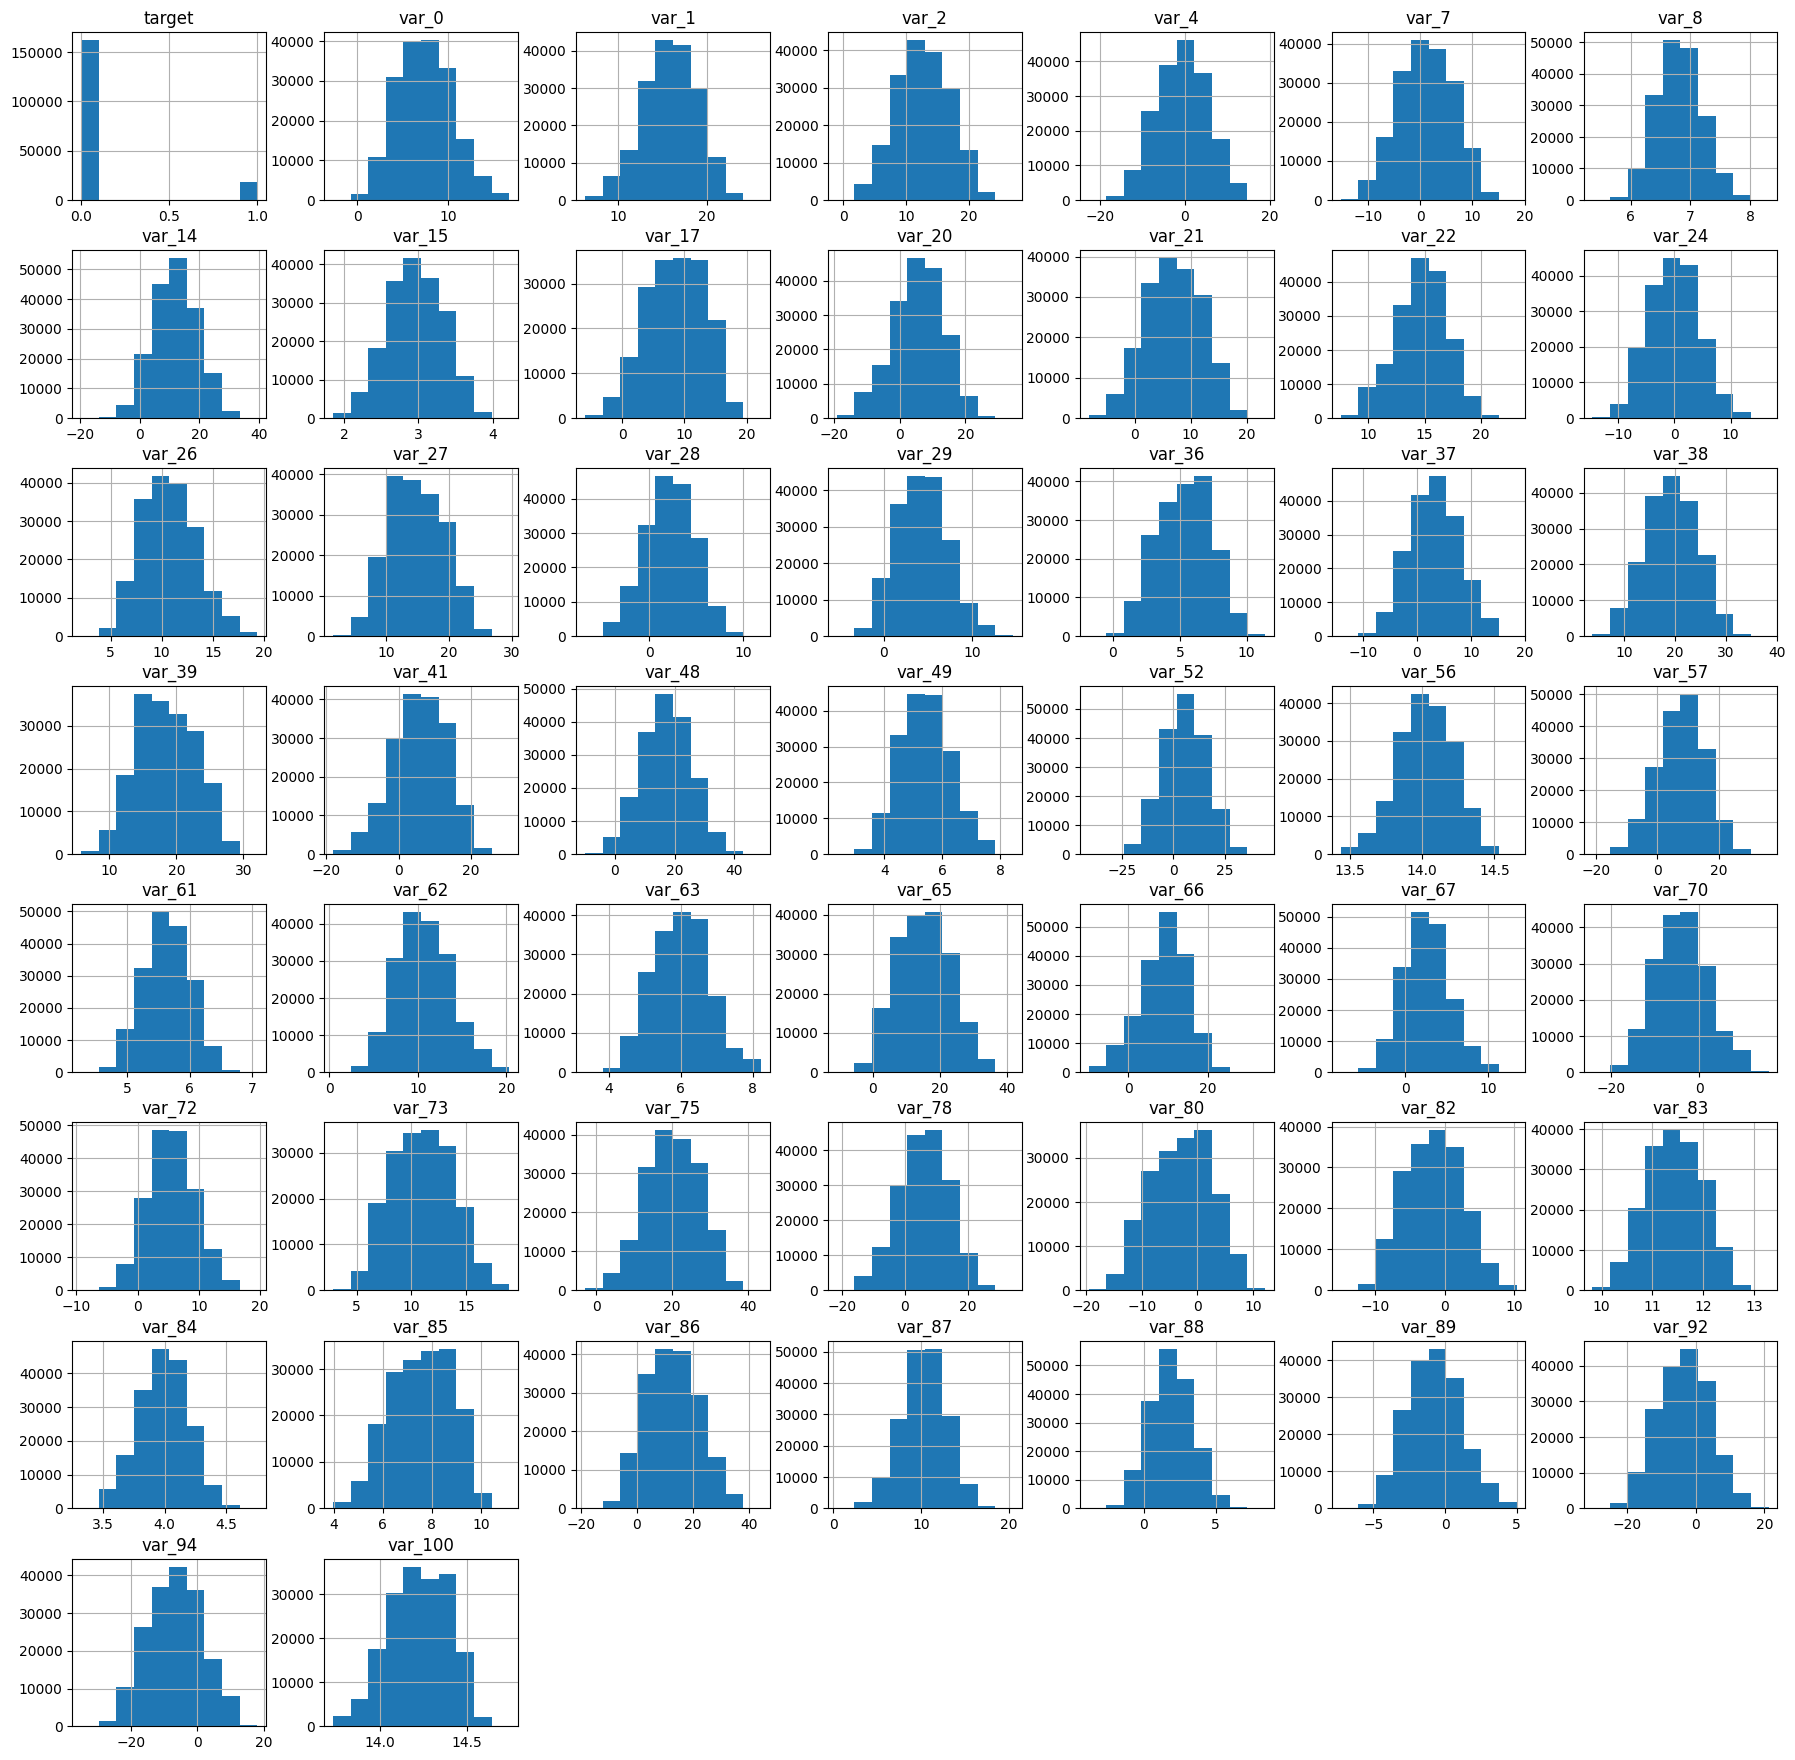

In [32]:
transaction_cleaned.hist(figsize=(22,22)); # question 6 is completed

- Each variable is categorized into two groups of '0' for no transaction and '1' for successful transaction based on its value in the target column.  

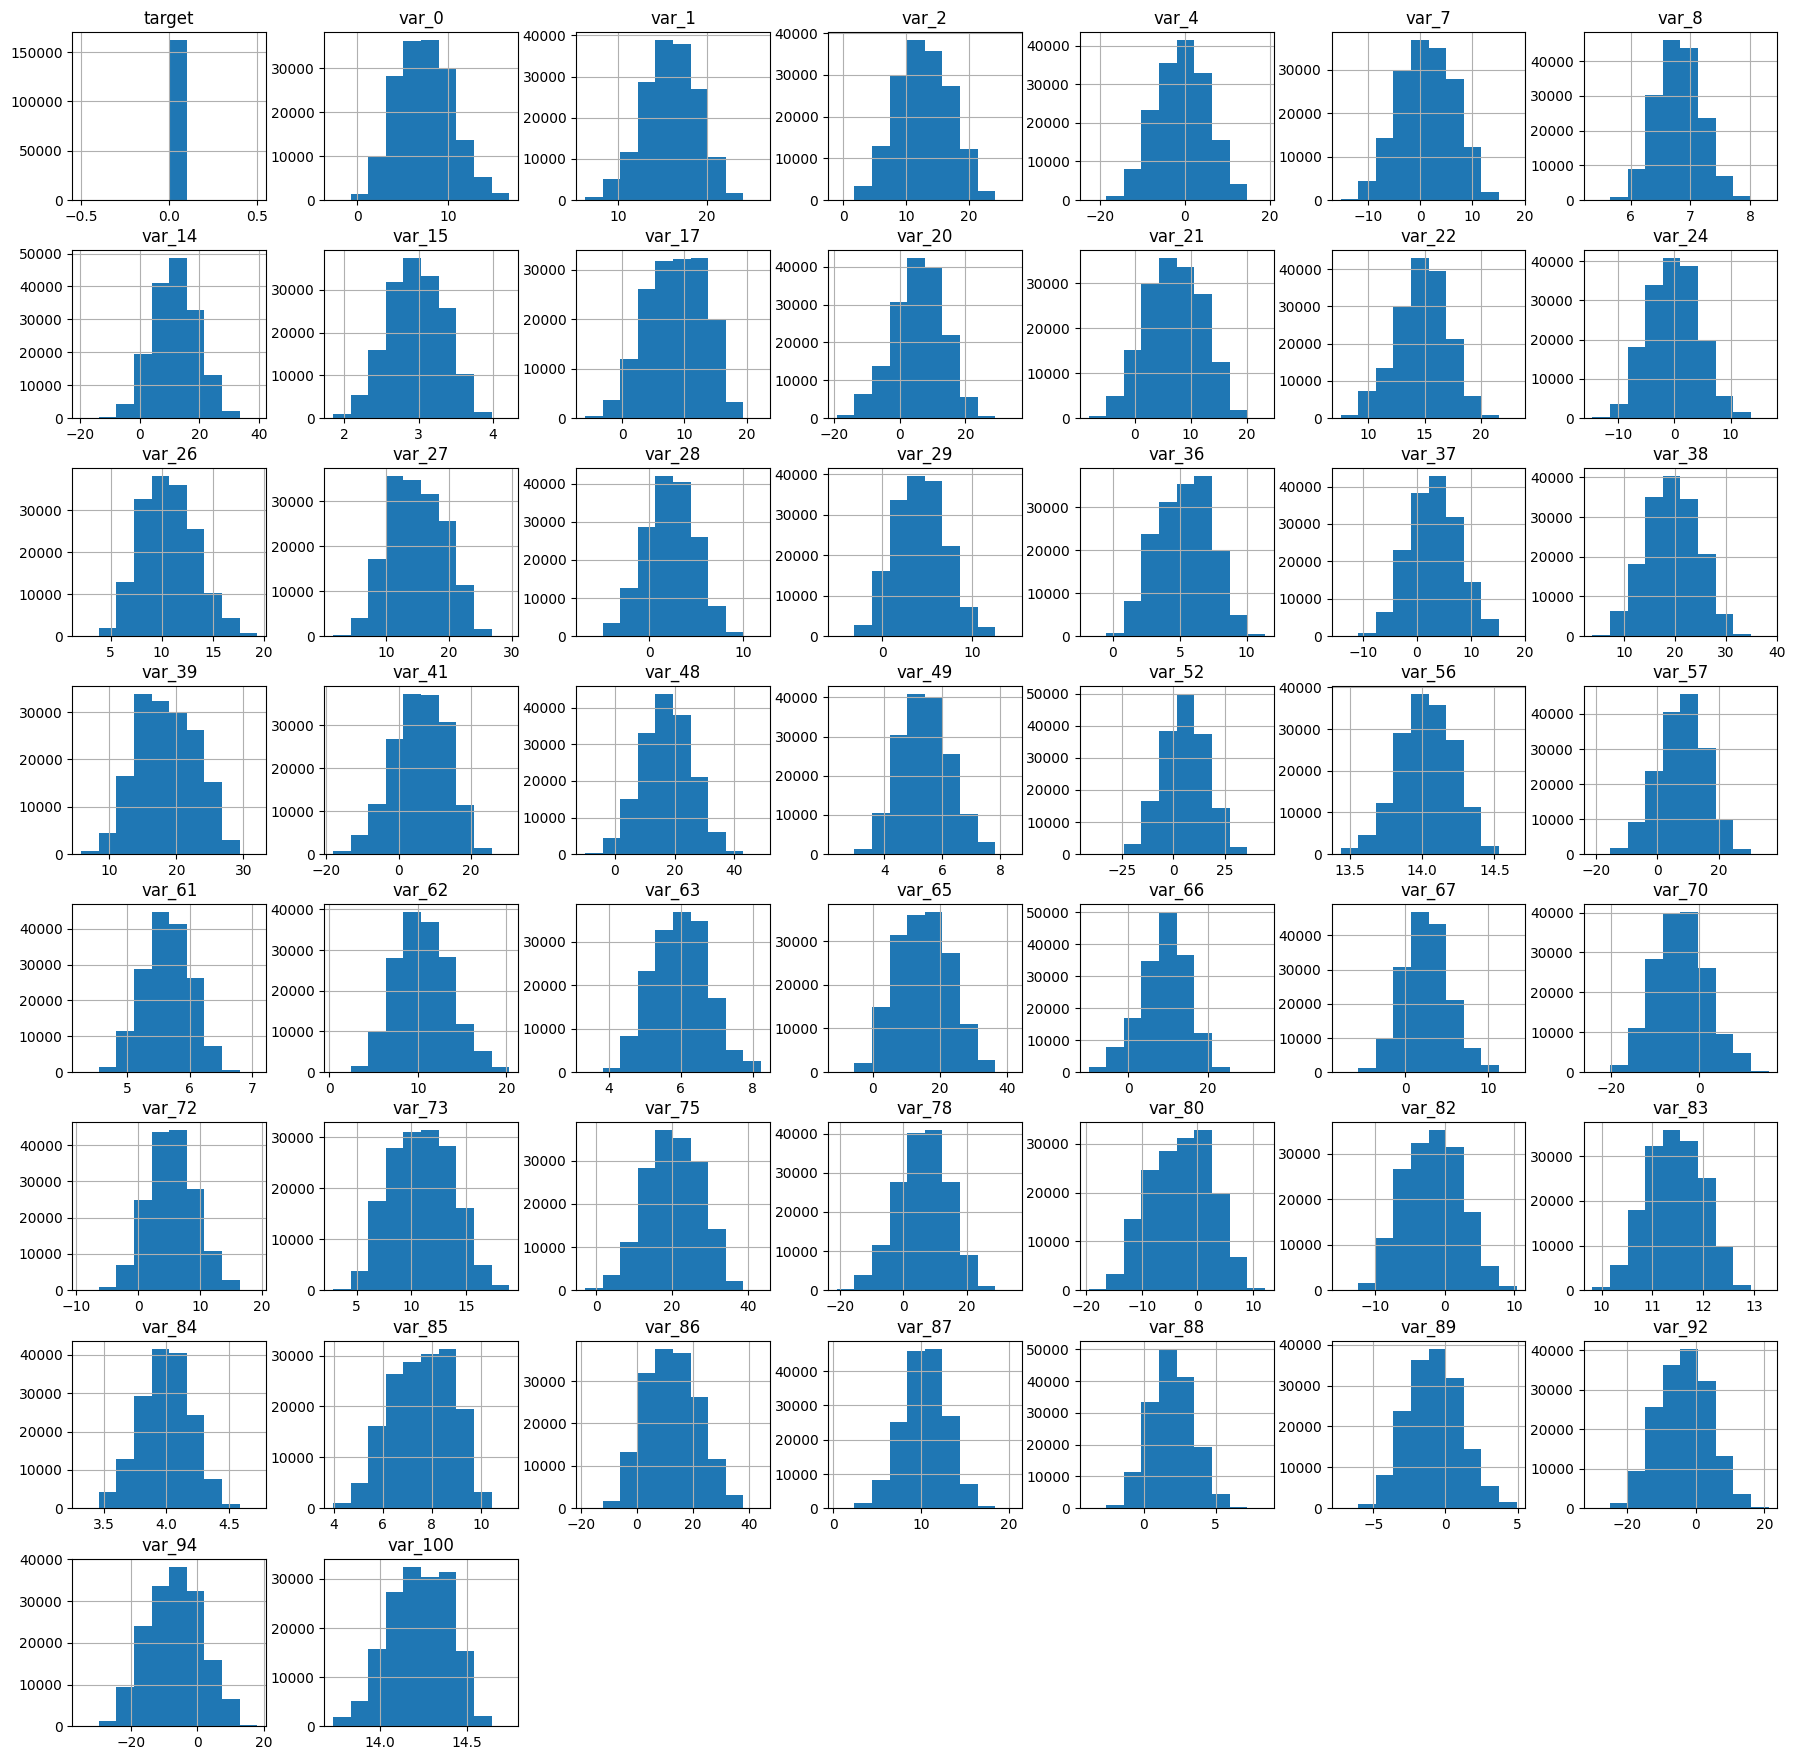

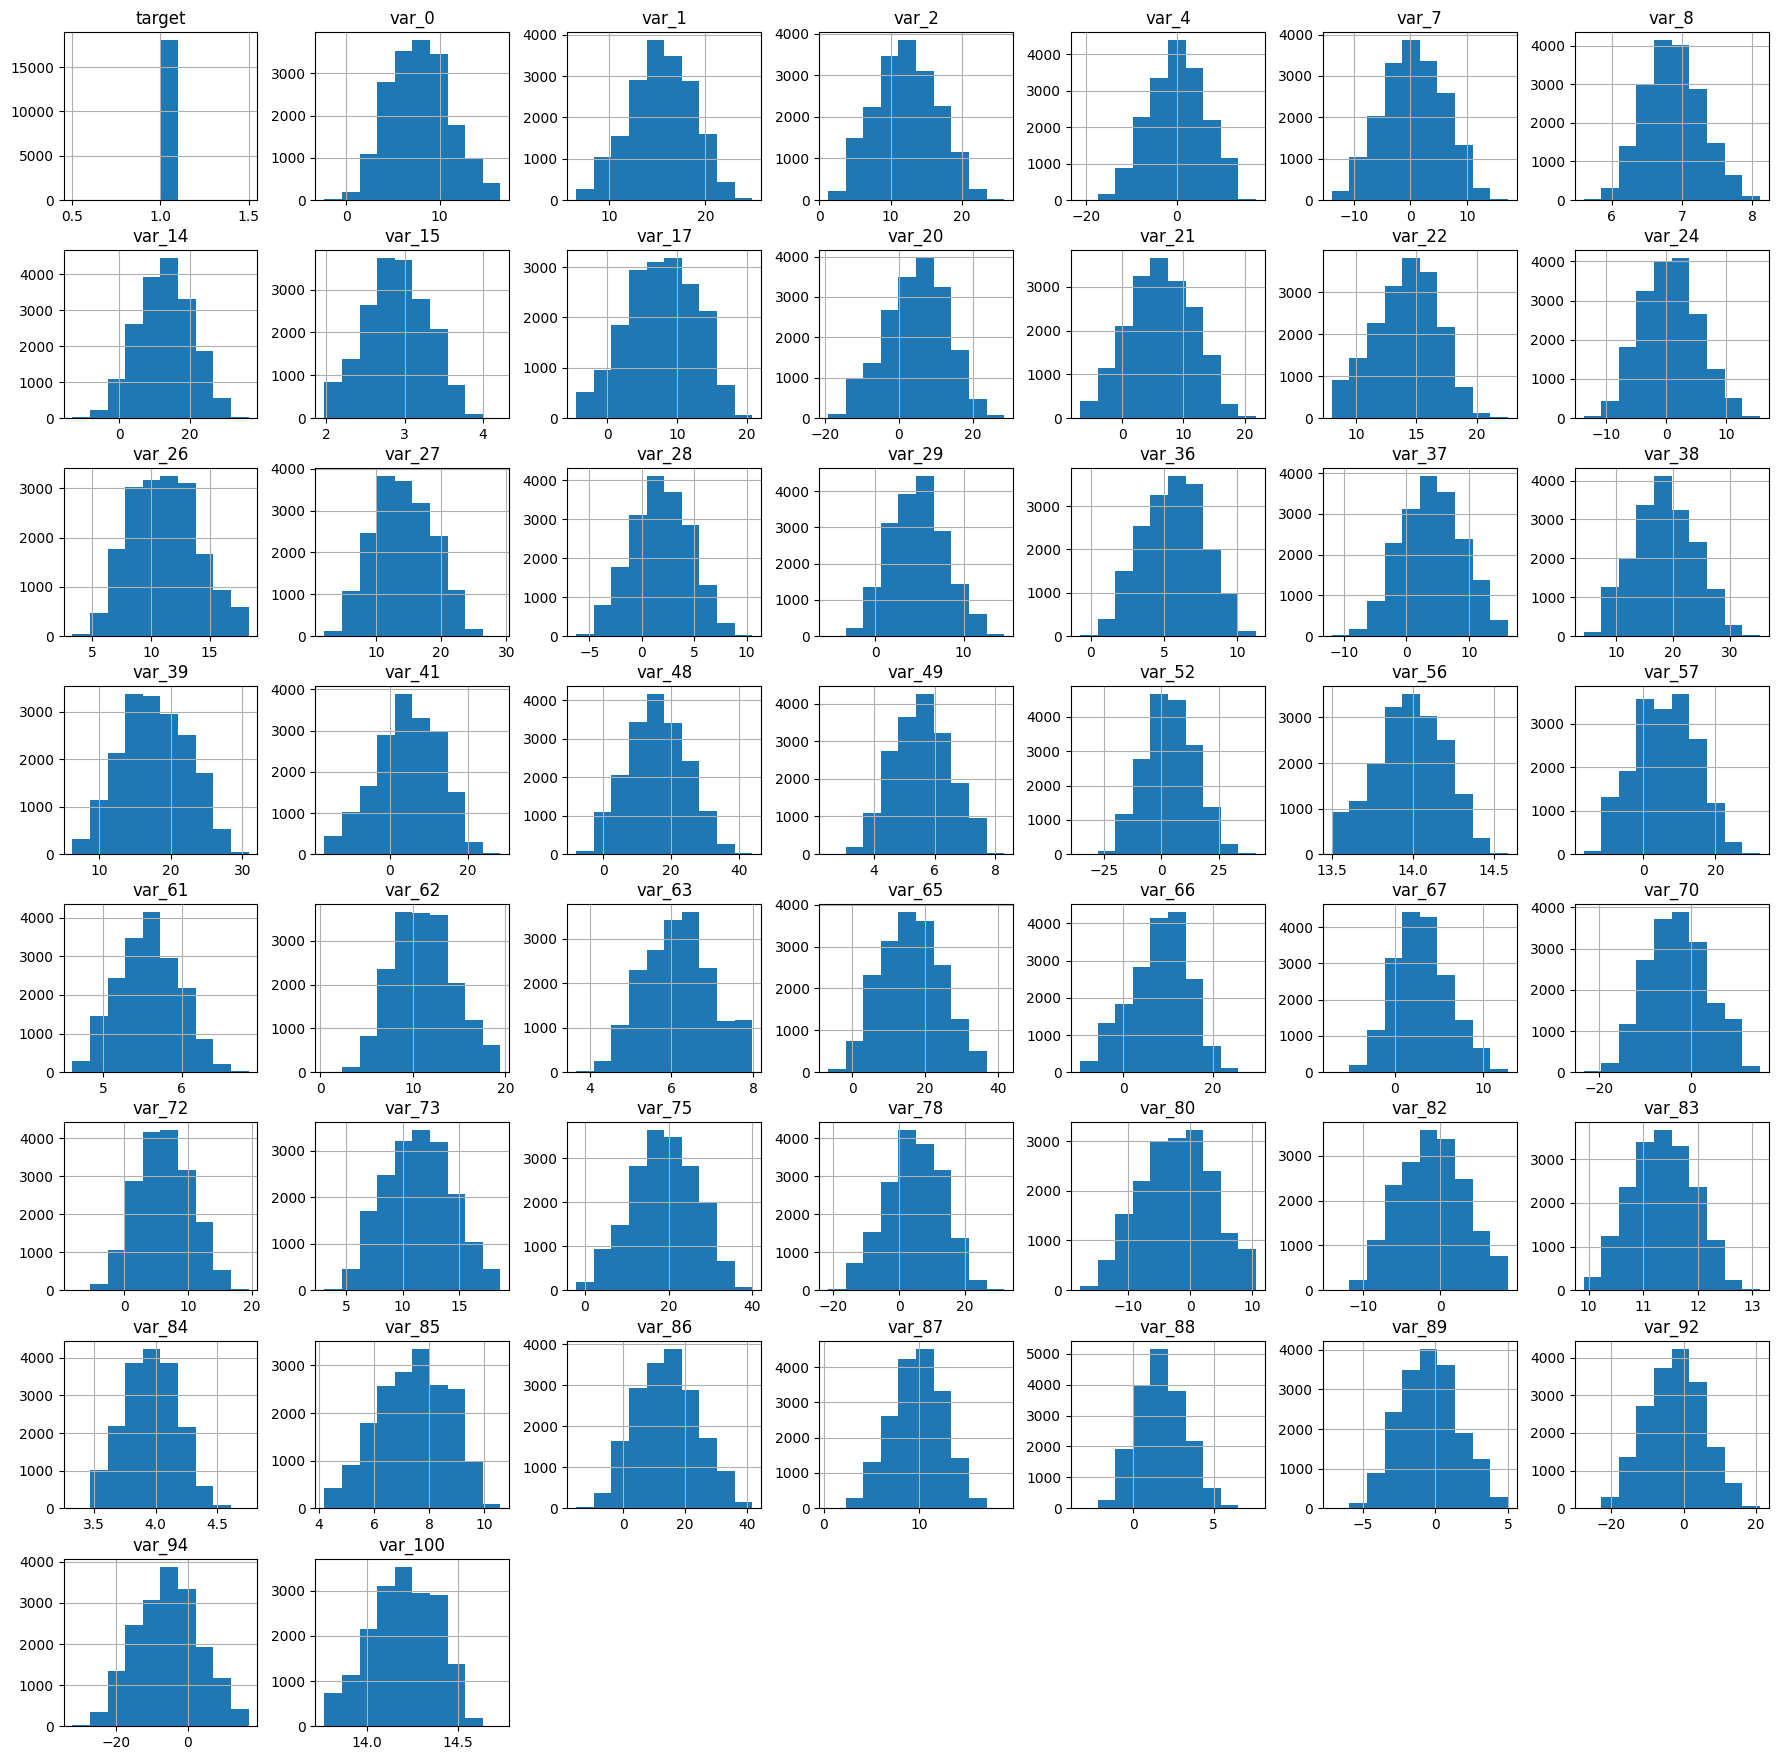

In [33]:
transaction_cleaned.groupby(['target']).hist(figsize=(22,22));

- Then, let's check the correlation values between all predictor columns to ensure there are no substantial correlations between predictors.
- This is important to support the decision to classify the ‘target’ using Naïve Bayes.

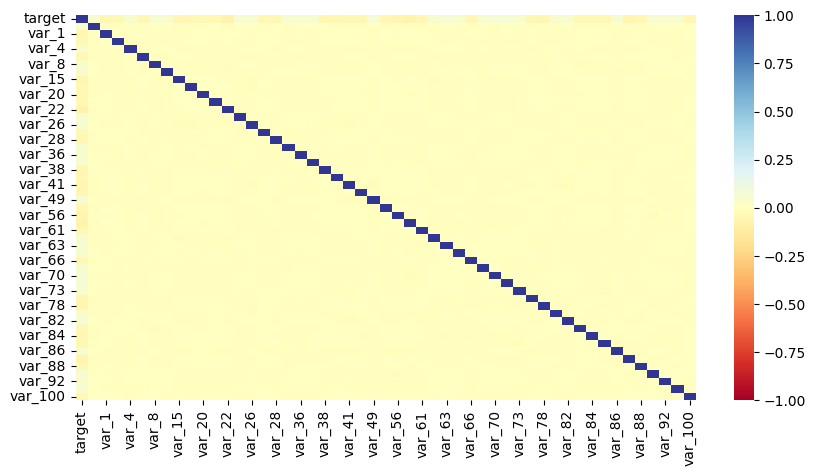

In [34]:
corr = transaction_cleaned.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, cmap='RdYlBu',annot = False, vmin=-1, vmax=1);

## Data Processing



# **Gaussian Naive Bayes Model**

Create the GNB model

In [38]:
# Create a Naive Bayes Classifier (This is an emtpy model)
modelGNB = GaussianNB()

In [39]:
# We'll separate our features (columns) and target column
# Create a copy of the dataframe excluding the target column
features = transaction_cleaned.drop('target', axis=1).copy()

# Create a copy of the target column
target = transaction_cleaned['target'].copy()

In [40]:
# We'll separate our features (columns) and target column
# Create a copy of the dataframe excluding the target column

# y represents target
y = transaction_cleaned['target'].copy() # y represents target

# x represents features of the dataframe referring to the columns of var_0 to var_100
x = transaction_cleaned.drop('target', axis=1, inplace=False)

In [41]:
x

,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,var_20,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,0.5878,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
5,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,6.5456,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
11,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,18.7893,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
15,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,1.1400,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
19,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,7.8002,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,7.9632,20.4650,10.7295,2.9322,5.0267,7.1953,10.0695,3.0732,11.0135,3.1549,...,12.1000,4.2019,7.1249,14.6591,10.2705,3.5833,2.5588,10.4219,-19.7158,14.0582
1049993,5.0862,14.4785,17.3709,-2.4732,-2.5987,6.6798,3.0420,2.4057,18.2729,3.9661,...,10.9960,3.9637,8.0217,11.0449,9.3100,1.0545,-2.8770,-2.8052,-13.7290,14.3794
1049995,11.3251,16.4148,20.5955,-6.3011,-6.8112,7.3226,14.9182,2.4579,14.7175,3.8858,...,11.2265,3.8431,8.2748,-7.8464,9.9774,1.7377,-1.7942,1.3921,-16.4925,14.4421
1049997,8.9941,13.4127,3.9567,3.5744,1.6614,6.1486,12.0996,2.5439,10.2936,2.0014,...,10.5067,4.0642,8.3381,17.9081,12.3357,2.6530,-1.2359,2.0836,-18.6168,14.0689


In [42]:
# To train the model and use train_test_split
x_transaction_cleaned, x_test, y_transaction_cleaned, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# See if the GNB model fits this dataset (trtansaction.cleaned)
modelGNB.fit(x_transaction_cleaned, y_transaction_cleaned)

# Then, compare the prediction of the data called y_pred vs. the test set named x_test, and tells how accuracy it is.
y_pred = modelGNB.predict(x_test)

# Compare the y_test (20% that was hidden from the model) with the y_pred
print("Number of mislabeled points out of a total %d points : %d"
      % (x_test.shape[0], (y_test != y_pred).sum()))

# print(f"Number of mislabeled points out of a total {x_test.shape[0]} points : {(y_test != y_pred).sum()}"


Number of mislabeled points out of a total 36000 points : 3211


In [43]:
for i in [x_transaction_cleaned, x_test, y_transaction_cleaned, y_test]:
  print(type(i))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [44]:
for i in [x_transaction_cleaned, x_test, y_transaction_cleaned, y_test]:
  print(i.shape)

(144000, 50)
(36000, 50)
(144000,)
(36000,)


In [45]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [46]:
(y_test.to_numpy() - y_pred)*1000

array([   0., 1000.,    0., ...,    0.,    0.,    0.])

# Cross-Validation

- Now, let's perform a cross-validation loop to calculate the accuracy score of this Gaussian Naive Bayes model.

In [47]:
# To perform cross validation to see what our average accuracy is,
# First, we'll create a function for cross-validation.

def cross_validate(x, y, num_loops):
  '''
  Randomly splits x and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.

  '''

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    x_transaction_cleaned, x_test, y_transaction_cleaned, y_test = model_selection.train_test_split(x, y, test_size = 0.2)
    model_split_cv.fit(x_transaction_cleaned, y_transaction_cleaned)
    y_split_pred = model_split_cv.predict(x_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

In [48]:
# Now, let's run our function defined above
accuracy_scores = cross_validate(x, y, 100)
print(round(accuracy_scores.mean(), 5))

# .mean is used to extract the average of accuracy scores of this model testing and 5 means decimal points

0.9113



> The accuracy of this model is 91%.



Let's observe how the distribution of accuracy scores looks like?

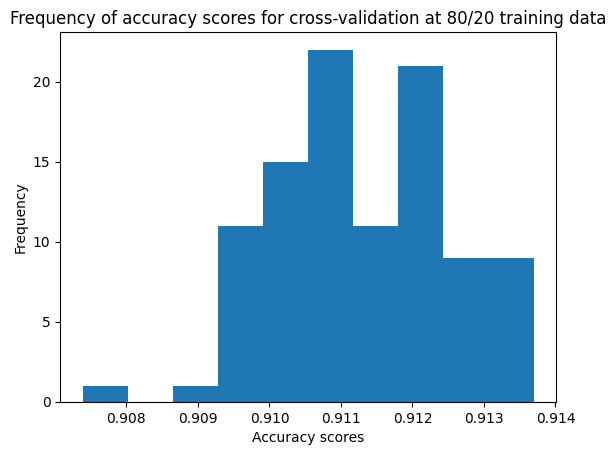

In [49]:
plt.hist(accuracy_scores)
plt.title('Frequency of accuracy scores for cross-validation at 80/20 training data')
plt.xlabel('Accuracy scores')
plt.ylabel('Frequency');
plt.show()

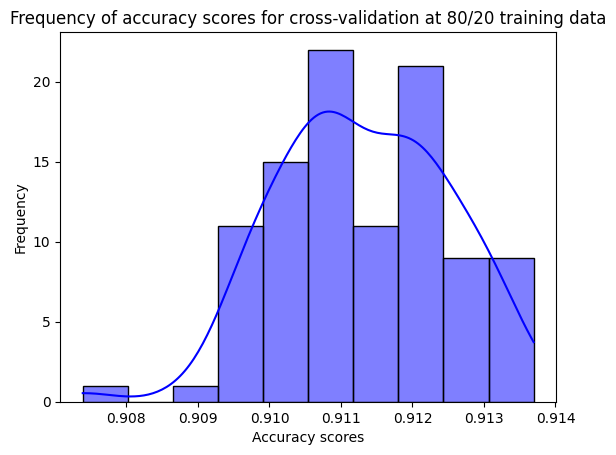

In [50]:
sns.histplot(x = accuracy_scores, kde = True, color='blue')
plt.title('Frequency of accuracy scores for cross-validation at 80/20 training data')
plt.xlabel('Accuracy scores')
plt.ylabel('Frequency');
plt.show()

- Confusion matrix is plotted to visualizes and summarizes the performance of this Gaussian Naive Bayes classification model.

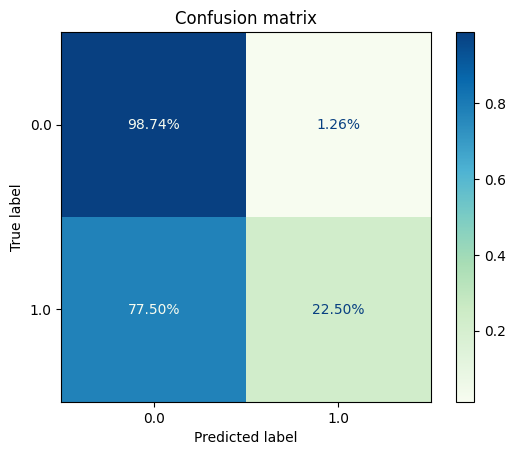

In [51]:
metrics.ConfusionMatrixDisplay.from_estimator(
    modelGNB,
    x_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')

> We can see that our model performs better if it is used to predict that the customers do not transaction rather than if the customers will make the transactions.

> But, hold on a sec!
If we look at the frequency of the no transactions versus the successful transactions, we can see that our input data was imbalanced by skewing towards the no transactions instead of the successful transactions.

> ***Meaning that we might not be able to use this model to predict whether the customers will make transactions with this dataset.



## Data Visualization





In [52]:
def cross_validate(x, y, num_loops):
  '''
  Randomly splits x and y values into train/test groups (test size = 50%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.

  '''

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    x_transaction_cleaned, x_test, y_transaction_cleaned, y_test = model_selection.train_test_split(x, y, test_size = 0.5)
    model_split_cv.fit(x_transaction_cleaned, y_transaction_cleaned)
    y_split_pred = model_split_cv.predict(x_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

In [53]:
accuracy_scores = cross_validate(x, y, 100)
print(round(accuracy_scores.mean(), 5))

0.91124


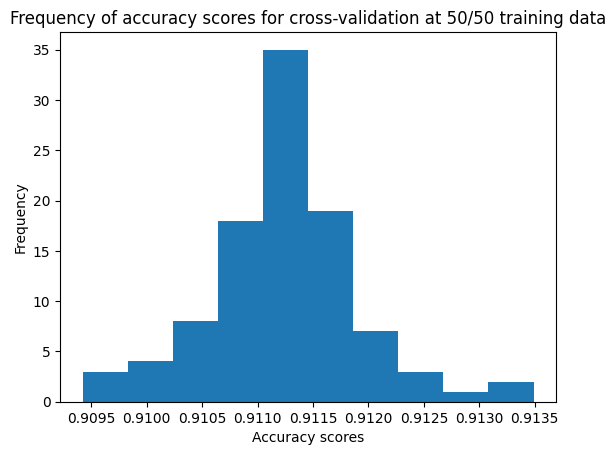

In [54]:
plt.hist(accuracy_scores)
plt.title('Frequency of accuracy scores for cross-validation at 50/50 training data')
plt.xlabel('Accuracy scores')
plt.ylabel('Frequency');
plt.show()

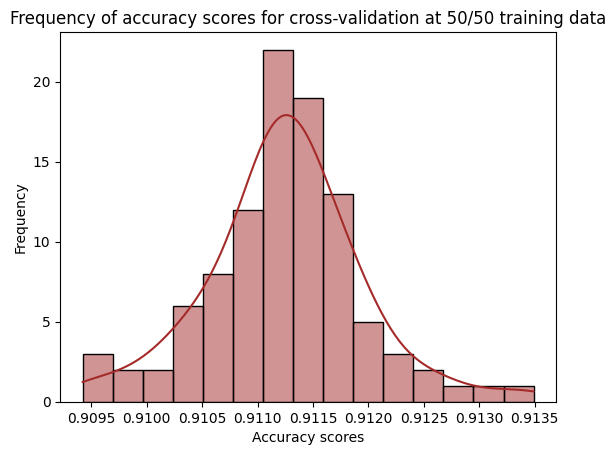

In [55]:
sns.histplot(x = accuracy_scores, kde = True, color='brown')
plt.title('Frequency of accuracy scores for cross-validation at 50/50 training data')
plt.xlabel('Accuracy scores')
plt.ylabel('Frequency');
plt.show()

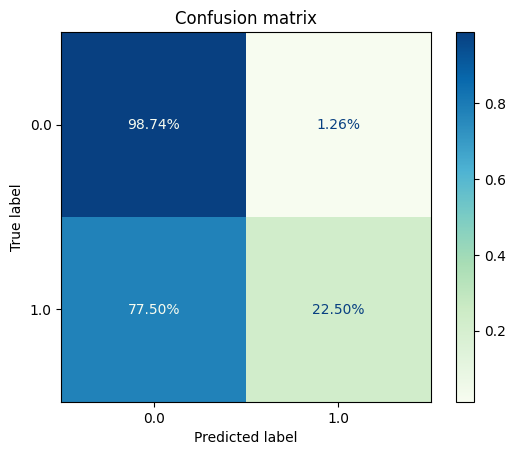

In [56]:
metrics.ConfusionMatrixDisplay.from_estimator(
    modelGNB,
    x_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')

## Conclusion



Important features:

We saw that the binary values in the column named "target" was the most crucial parameter in determining whether the customers would make transactions.

Model performance:
- Using Naive Bayes resulted in an acceptable accuracy of 91% in our cross-validation tests.

- None of the unique variables are correlated with each other meaning that Gaussian Naive Bayes is a suitable model to use with this dataset prediction.
- Our model did better at predicting if the customers did not make transactions than if the customers would make transactions. This is because our input dataset was imbalanced by skewing towards the group of no transaction in the training set.

# Future exploration:

*   It would be more fascinating to see how this model can fit with the balanced dataset.
*   It is worth collecting the data properly instead of having many missing values in the dataset which may impact the balance of the data.

